# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


lat = []
lng = []
temp = []
cloudiness = []
country = []
date = []
Humidity = []
temp_max = []
wind_speed = []
city_name = []
city_num = 0

print("Beginning Data Retrieval")
print("----------------------------")

for city in cities:

    response = requests.get(query_url + city).json()

    try:

        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
    
        print(f"Processing Record {city_num} | {city}")

        city_num += 1
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 0 | rikitea
Processing Record 1 | jieshi
Processing Record 2 | krasnogorskoye
Processing Record 3 | touros
Processing Record 4 | dikson
Processing Record 5 | tautira
Processing Record 6 | broome
City not found. Skipping...
Processing Record 7 | sfantu gheorghe
Processing Record 8 | taylor
Processing Record 9 | jamestown
City not found. Skipping...
Processing Record 10 | ust-nera
Processing Record 11 | kabinda
Processing Record 12 | albany
Processing Record 13 | georgetown
City not found. Skipping...
Processing Record 14 | busselton
Processing Record 15 | mar del plata
Processing Record 16 | say
Processing Record 17 | arlit
Processing Record 18 | souillac
Processing Record 19 | hovd
Processing Record 20 | faya
Processing Record 21 | saint george
Processing Record 22 | kirakira
Processing Record 23 | prince george
Processing Record 24 | atuona
Processing Record 25 | cape town
Processing Record 26 | clyde river
Proces

Processing Record 230 | aykhal
City not found. Skipping...
Processing Record 231 | provideniya
Processing Record 232 | oistins
Processing Record 233 | san policarpo
City not found. Skipping...
Processing Record 234 | talnakh
Processing Record 235 | serov
Processing Record 236 | ojinaga
Processing Record 237 | goderich
Processing Record 238 | tamandare
Processing Record 239 | krasnoselkup
Processing Record 240 | tilichiki
Processing Record 241 | tumpat
Processing Record 242 | lazaro cardenas
Processing Record 243 | half moon bay
Processing Record 244 | bengkulu
Processing Record 245 | martinsicuro
Processing Record 246 | borger
Processing Record 247 | sangareddi
Processing Record 248 | kiunga
Processing Record 249 | tecoanapa
Processing Record 250 | seymchan
Processing Record 251 | jalna
Processing Record 252 | chimbote
Processing Record 253 | mayo
Processing Record 254 | saldanha
Processing Record 255 | collie
City not found. Skipping...
Processing Record 256 | porbandar
Processing Rec

Processing Record 463 | sabha
City not found. Skipping...
Processing Record 464 | fort nelson
Processing Record 465 | anadyr
Processing Record 466 | crotone
City not found. Skipping...
Processing Record 467 | valparaiso
Processing Record 468 | margate
Processing Record 469 | kasongo
Processing Record 470 | aquiraz
Processing Record 471 | lufilufi
Processing Record 472 | bitkine
Processing Record 473 | bulgan
Processing Record 474 | touba
Processing Record 475 | lapua
Processing Record 476 | aden
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 477 | nabire
Processing Record 478 | nerl
City not found. Skipping...
Processing Record 479 | waingapu
Processing Record 480 | svetlaya
Processing Record 481 | buraydah
Processing Record 482 | iwanai
Processing Record 483 | bambanglipuro
Processing Record 484 | coffs harbour
Processing Record 485 | ust-tsilma
Processing Record 486 | baijiantan
Processing Record 487 | bereda
Processing Record 48

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame({
    'City':city_name,
    'Lat':lat,
    'Lng':lng,
    'Max Temp':temp_max,
    'Humidity':Humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.58,74,74,8.68,PF,1619472743
1,Jieshi,22.8134,115.8257,71.01,85,100,13.71,CN,1619473320
2,Krasnogorskoye,52.2953,86.1979,37.11,84,100,1.52,RU,1619473320
3,Touros,-5.1989,-35.4608,80.60,78,20,9.22,BR,1619472877
4,Dikson,73.5069,80.5464,31.78,98,100,17.69,RU,1619472838
...,...,...,...,...,...,...,...,...,...
585,Rawlins,41.7911,-107.2387,62.60,8,1,33.38,US,1619473488
586,Kloulklubed,7.0419,134.2556,80.98,79,97,6.85,PW,1619473489
587,Vysokogornyy,50.1167,139.1500,37.42,74,35,2.28,RU,1619473489
588,Mogadishu,2.0371,45.3438,82.99,75,81,7.65,SO,1619473490


In [5]:
weather_data.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [6]:
weather_data.to_csv("../output_data/cities.csv", header=True)

In [7]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.00000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,19.97864,21.948611,60.786644,69.515254,55.491525,7.509119,1.619473e+09
std,32.80187,91.558491,20.391639,23.204464,36.910930,5.292964,2.649008e+02
min,-54.80000,-179.166700,2.980000,5.000000,0.000000,0.000000,1.619473e+09
25%,-7.92785,-57.703975,44.600000,60.250000,20.000000,3.475000,1.619473e+09
50%,20.86455,26.024300,64.895000,75.000000,64.500000,6.330000,1.619473e+09
75%,48.64680,103.276025,78.010000,87.000000,90.000000,10.182500,1.619473e+09
max,78.21860,179.316700,100.990000,100.000000,100.000000,33.380000,1.619473e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
Humidity = weather_data.loc[weather_data["Humidity"]>100]
Humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

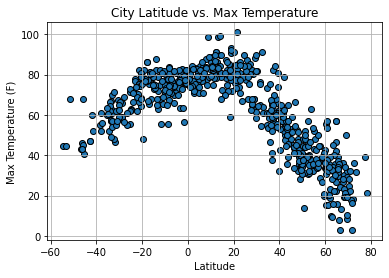

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolors="black")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/CityLat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

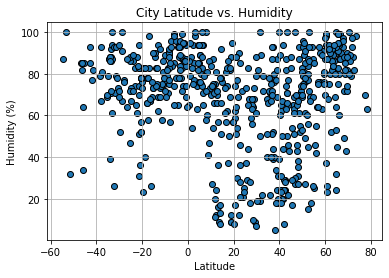

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/CityLat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

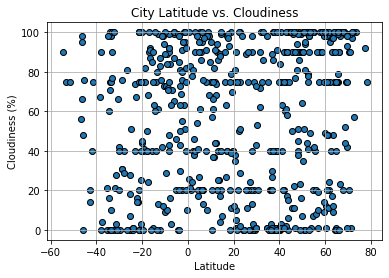

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/CityLat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

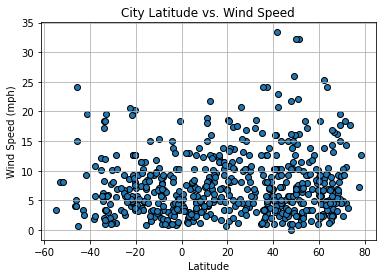

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/CityLat_vs_WindSpeed.png")
plt.show()

## Linear Regression

In [15]:
Northern_Hemisphere = weather_data.loc[weather_data['Lat'] > 0] 
Sorthern_Hemisphere = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8884326361983046
y = -0.96x + 93.65


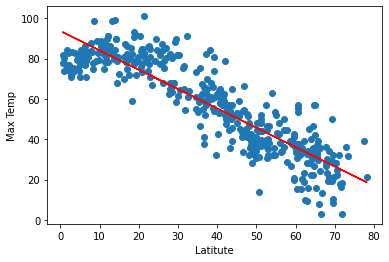

In [16]:
plt.scatter(Northern_Hemisphere['Lat'],Northern_Hemisphere['Max Temp'])
plt.xlabel('Latitute')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_Hemisphere['Lat'],Northern_Hemisphere['Max Temp'])
regress_values = Northern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Northern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/NH_MaxTemp_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7221704280234572
y = 0.59x + 80.76


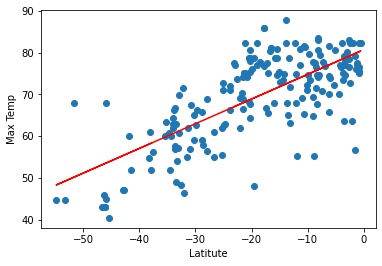

In [17]:
plt.scatter(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Max Temp'])
plt.xlabel('Latitute')
plt.ylabel('Max Temp')

(slope, intercept, rvalue, pvalue, stderr) = linregress(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Max Temp'])
regress_values = Sorthern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Sorthern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/SH_MaxTemp_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.16679183480403267
y = 0.2x + 57.79


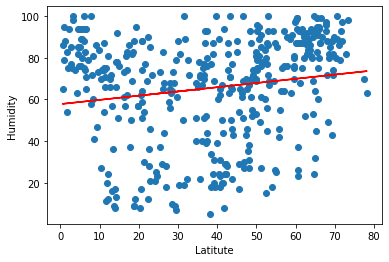

In [18]:
plt.scatter(Northern_Hemisphere['Lat'],Northern_Hemisphere['Humidity'])
plt.xlabel('Latitute')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_Hemisphere['Lat'],Northern_Hemisphere['Humidity'])
regress_values = Northern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Northern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/NH_Humidity_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15820972611958228
y = 0.18x + 81.27


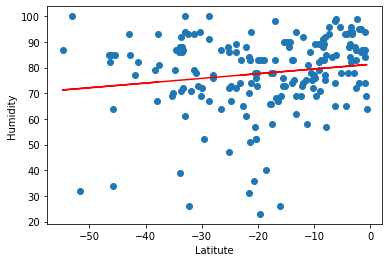

In [19]:
plt.scatter(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Humidity'])
plt.xlabel('Latitute')
plt.ylabel('Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Humidity'])
regress_values = Sorthern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Sorthern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/SH_Humidity_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14410733983607202
y = 0.26x + 45.93


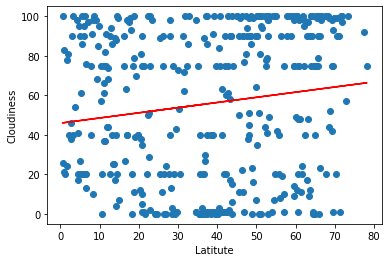

In [20]:
plt.scatter(Northern_Hemisphere['Lat'],Northern_Hemisphere['Cloudiness'])
plt.xlabel('Latitute')
plt.ylabel('Cloudiness')

#Calculate and Plot Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_Hemisphere['Lat'],Northern_Hemisphere['Cloudiness'])
regress_values = Northern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Northern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/NH_Cloudiness_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1546439500825946
y = 0.42x + 62.42


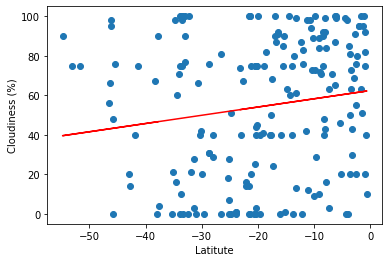

In [21]:
plt.scatter(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Cloudiness'])
plt.xlabel('Latitute')
plt.ylabel('Cloudiness (%)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Cloudiness'])
regress_values = Sorthern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Sorthern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/SH_Cloudiness_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.050646504988624115
y = 0.01x + 7.4


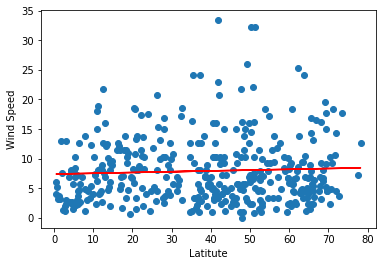

In [22]:
plt.scatter(Northern_Hemisphere['Lat'],Northern_Hemisphere['Wind Speed'])
plt.xlabel('Latitute')
plt.ylabel('Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = linregress(Northern_Hemisphere['Lat'],Northern_Hemisphere['Wind Speed'])
regress_values = Northern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Northern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/NH_WindSpeed_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15141510194650168
y = -0.05x + 5.61


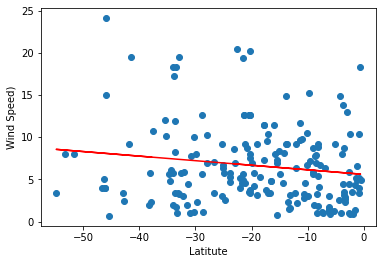

In [23]:
plt.scatter(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Wind Speed'])
plt.xlabel('Latitute')
plt.ylabel('Wind Speed)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(Sorthern_Hemisphere['Lat'],Sorthern_Hemisphere['Wind Speed'])
regress_values = Sorthern_Hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_string=f'The r-value is: {rvalue}'
plt.plot(Sorthern_Hemisphere['Lat'],regress_values,"r-")

plt.savefig("../output_data/SH_WindSpeed_vs_Lat.png")
print (f"The r-value is: {rvalue}")
print (line_eq)
plt.show()